First try

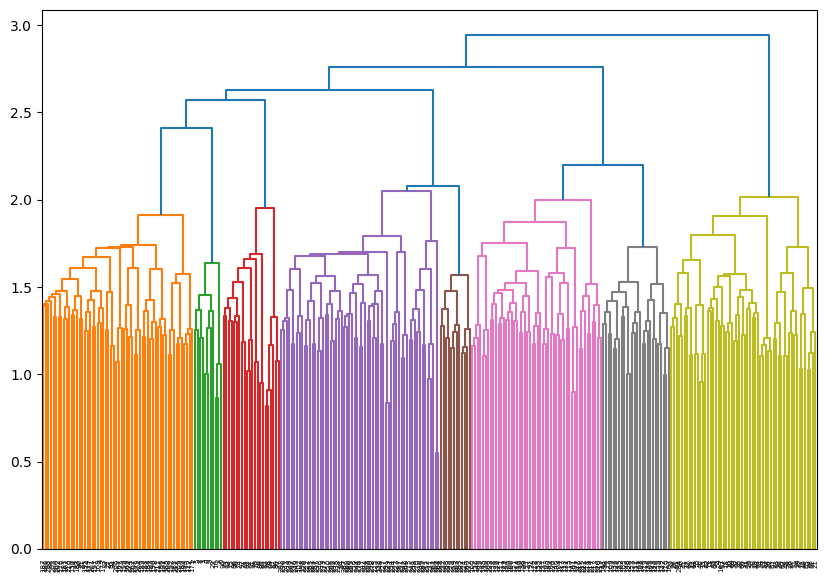

                     ID           Event  \
0    529660296080915968  prince-toronto   
1    529653029747064832  prince-toronto   
2    529687410611728384  prince-toronto   
3    529713467184676864  prince-toronto   
4    529689679411810304  prince-toronto   
..                  ...             ...   
291  553501357156876290   charlie-hebdo   
292  553474188259102720   charlie-hebdo   
293  552848620375261184   charlie-hebdo   
294  553184482241814530   charlie-hebdo   
295  552792913910833152   charlie-hebdo   

                                                  text  cluster  
0    Prince is playing a secret show in Toronto ton...        0  
1    Prince fans lining up at Massey Hall. Wristban...        0  
2    Is it true? Prince rumoured to be performing s...        0  
3    Secret Prince show rumored for Toronto tonight...        0  
4    People talking about stupid shit like governme...        0  
..                                                 ...      ...  
291  #CharlieHebdo su

In [1]:

import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Carica i dati dal file CSV e seleziona la colonna "text"
df = pd.read_excel("/Users/claudiasantoro/Desktop/Magistrale-POLIMI/Tesi/RisultatiGit/MergeDataset.xlsx")
text_data = df["text"]

# Crea una matrice di features TF-IDF dai dati di testo
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Applica l'algoritmo di clustering gerarchico agglomerativo con linkage "ward"
linked = linkage(X.toarray(), 'ward')

# Visualizza il dendrogramma per determinare il numero di cluster
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Applica l'algoritmo di clustering gerarchico agglomerativo con il numero di cluster determinato dal dendrogramma
distance_threshold = max(linked[:,2])
cluster = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold= distance_threshold)
cluster.fit_predict(X.toarray())

# Crea un nuovo dataframe per visualizzare i risultati del clustering
cluster_df = pd.DataFrame({'ID': df['ID'], 'Event' : df['Event'], 'text': text_data, 'cluster': cluster.labels_})

# Visualizza il dataframe dei cluster
print(cluster_df)

Second Try:


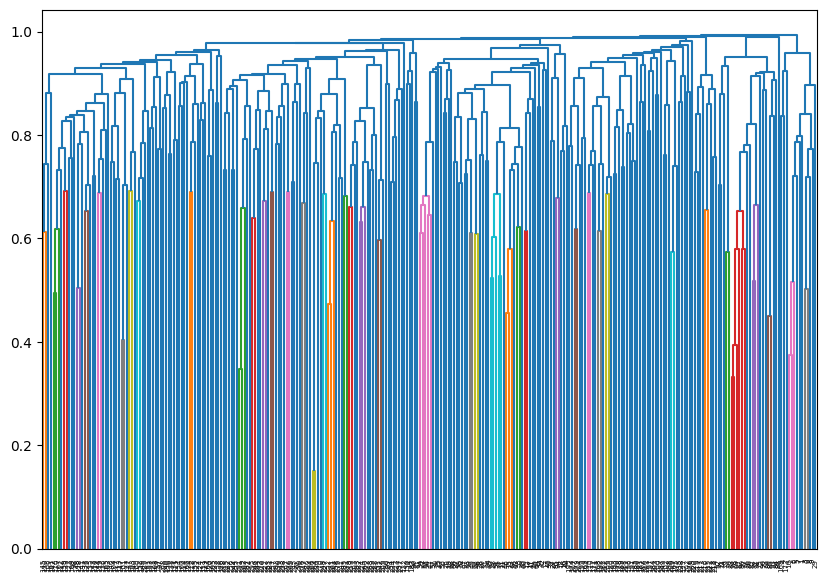

              Event  cluster
0    prince-toronto        1
1    prince-toronto        1
2    prince-toronto        1
3    prince-toronto        1
4    prince-toronto        1
..              ...      ...
291   charlie-hebdo        0
292   charlie-hebdo        0
293   charlie-hebdo        0
294   charlie-hebdo        0
295   charlie-hebdo        0

[296 rows x 2 columns]


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

# Carica i dati dal file CSV e seleziona la colonna "text"
df = pd.read_excel("/Users/claudiasantoro/Desktop/Magistrale-POLIMI/Tesi/RisultatiGit/MergeDataset.xlsx")
text_data = df["text"]

# Crea una matrice di features TF-IDF dai dati di testo
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)

# Applica l'algoritmo di clustering gerarchico agglomerativo con linkage "average" e la distanza cosine
linked = linkage(X.toarray(), 'average', metric='cosine')

# Visualizza il dendrogramma per determinare il numero di cluster
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Applica l'algoritmo di clustering gerarchico agglomerativo con il numero di cluster determinato dal dendrogramma
distance_threshold = max(linked[:,2])
cluster = AgglomerativeClustering(n_clusters=5, metric='cosine', linkage='average', distance_threshold=None)
cluster.fit_predict(X.toarray())

# Crea un nuovo dataframe per visualizzare i risultati del clustering
cluster_df = pd.DataFrame({'ID': df['ID'], 'Event': df['Event'], 'text': text_data, 'cluster': cluster.labels_})

# Visualizza il dataframe dei cluster
print(cluster_df[['Event','cluster']])



Best Try: 

[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/claudiasantoro/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/claudiasantoro/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


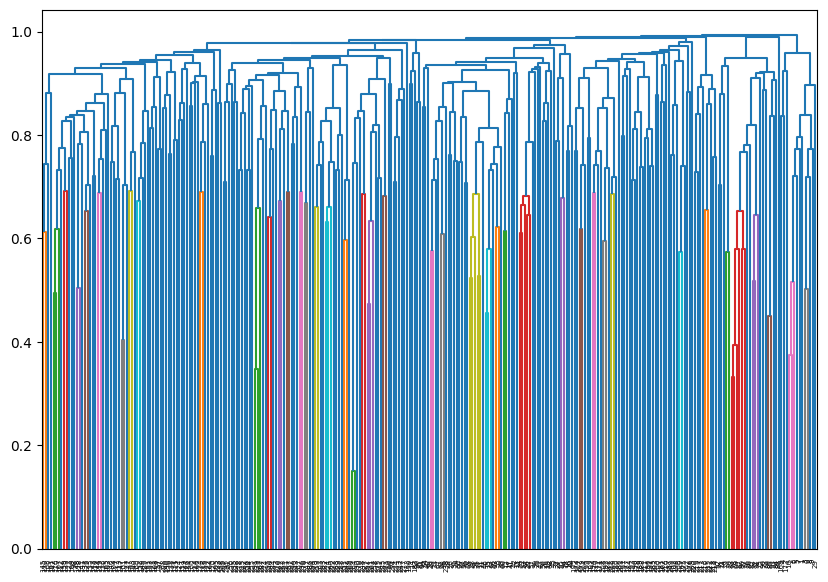

              Event  cluster
0    prince-toronto        3
1    prince-toronto        3
2    prince-toronto        3
3    prince-toronto        3
4    prince-toronto        3
..              ...      ...
291   charlie-hebdo        2
292   charlie-hebdo        2
293   charlie-hebdo        2
294   charlie-hebdo        2
295   charlie-hebdo        2

[296 rows x 2 columns]


In [9]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk
nltk.download('punkt_tab')
nltk.download('stopwords')
# Carica i dati dal file CSV e seleziona la colonna "text"
df = pd.read_excel("/Users/claudiasantoro/Desktop/Magistrale-POLIMI/Tesi/RisultatiGit/MergeDataset.xlsx")
text_data = df["text"]
stop_words = set(stopwords.words("english"))
# Preprocessa i dati di testo (es. rimuovi punteggiatura, converti in minuscolo)
preprocessed_data = []
for text in text_data:
    text = text.lower()
    # Tokenizza il testo
    tokens = nltk.word_tokenize(text)
    # Rimuovi le stop words
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # Ricomponi il testo preprocessato
    preprocessed_text = ' '.join(filtered_tokens)
    preprocessed_data.append(preprocessed_text)

# Crea una matrice di features TF-IDF dai dati di testo preprocessati
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(preprocessed_data)

# Applica l'algoritmo di clustering gerarchico agglomerativo con linkage "average" e affinità "cosine"
linked = linkage(X.toarray(), 'average', metric='cosine')

# Visualizza il dendrogramma per determinare il numero di cluster
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.show()

# Applica l'algoritmo di clustering gerarchico agglomerativo con il numero di cluster determinato dal dendrogramma
distance_threshold = max(linked[:,2]) * 0.99
cluster = AgglomerativeClustering(n_clusters=None, metric='cosine', linkage='average', distance_threshold=distance_threshold)
cluster_labels = cluster.fit_predict(X.toarray())

# Crea un nuovo dataframe per visualizzare i risultati del clustering
cluster_df = pd.DataFrame({'ID': df['ID'], 'Event' : df['Event'], 'text': preprocessed_data, 'cluster': cluster_labels})

# Visualizza il dataframe dei cluster
print(cluster_df[['Event','cluster']])



In [11]:
# Gruppo per 'Event' e calcolo l'accuratezza per ciascuno
results = []

for event, group in cluster_df.groupby('Event'):
    cluster_counts = group['cluster'].value_counts()
    most_common_cluster = cluster_counts.idxmax()
    correct = cluster_counts.max()
    total = len(group)
    accuracy = round((correct / total) * 100, 2)
    
    results.append({
        'Event': event,
        'Total': total,
        'Cluster_Maggioranza': most_common_cluster,
        'Corretti': correct,
        'Accuratezza (%)': accuracy
    })

# Crea un DataFrame dei risultati
accuracy_df = pd.DataFrame(results)

# Mostra i risultati
print(accuracy_df.sort_values(by='Accuratezza (%)', ascending=False))


               Event  Total  Cluster_Maggioranza  Corretti  Accuratezza (%)
1       ebola-essien      2                    6         2           100.00
5     prince-toronto     11                    3        11           100.00
6       putinmissing      9                    7         9           100.00
0      charlie-hebdo     74                    2        72            97.30
4     ottawashooting     58                    6        55            94.83
7        sydneysiege     71                    2        67            94.37
2           ferguson     46                    0        43            93.48
3  germanwings-crash     25                    5        23            92.00
